<a href="https://colab.research.google.com/github/rahul123nayak/Campusx/blob/main/Copy_of_session_16_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

###`Q-1:` Write a program to create an empty series.

In [ ]:
# code here
sr = pd.Series()
sr

Series([], dtype: object)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [ ]:
# code here
sr1 = pd.Series([2,3,4,5,6])
sr2 = pd.Series([3,4,5,6,7])
print(pd.Series.add(sr1,sr2))
print(pd.Series.sub(sr1,sr2))
print(pd.Series.mul(sr1,sr2))
print(pd.Series.div(sr1,sr2))

0     5
1     7
2     9
3    11
4    13
dtype: int64
0   -1
1   -1
2   -1
3   -1
4   -1
dtype: int64
0     6
1    12
2    20
3    30
4    42
dtype: int64
0    0.666667
1    0.750000
2    0.800000
3    0.833333
4    0.857143
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [8]:
# code here
sd1 = pd.Series([2,3,6,8,10])
sd2 = pd.Series([1,3,5,7,10])
print(sd1==sd2)
print(sd1>sd2)

0    False
1     True
2    False
3    False
4     True
dtype: bool
0     True
1    False
2     True
3     True
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [11]:
# code here
def change(series):
  return pd.to_numeric(series, errors='coerce')

series = pd.Series([1,2,'Python', 2.0, True, 100])
change(series)

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [25]:
data = pd.read_csv('/content/batsman_runs_series.csv')
data.sort_values("batsman_run",ascending=False).head(10)


,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


###`Q-7` No of players having runs above 3000

In [31]:
# code here
data[data["batsman_run"] > 3000].count()

batter         20
batsman_run    20
dtype: int64

###`Q-8` No of players having runs above mean value?

In [38]:
# code here
data[data['batsman_run'] > data['batsman_run'].mean()].shape[0]

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [88]:
# code here
item = pd.read_csv('/content/items.csv',index_col=['item_name']).squeeze("columns")
item


item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [49]:
item.isna().sum()

50

In [93]:
def rupee(x):
  try:
    y = x[1:]
  except:
    y = x
  return float(y)*82.49
item = item.apply(rupee)


In [94]:
item.fillna(item.mean())

item_name
Chips and Fresh Tomato Salsa              197.1511
Izze                                      279.6411
Nantucket Nectar                          279.6411
Chips and Tomatillo-Green Chili Salsa     197.1511
Chicken Bowl                             1400.6802
                                           ...    
Steak Burrito                             969.2575
Steak Burrito                             969.2575
Chicken Salad Bowl                        928.0125
Chicken Salad Bowl                        721.7875
Chicken Salad Bowl                        721.7875
Name: item_price, Length: 4622, dtype: float64

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [95]:

item.mean()


615.6254681102363

In [96]:
# code here
item.quantile(q=0.3)

367.0805

In [97]:
item.quantile(q=0.06)

103.1125

<Axes: ylabel='Frequency'>

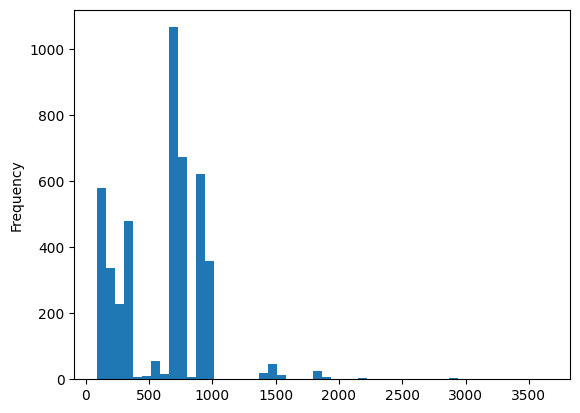

In [98]:
item.plot.hist(bins=50)

In [99]:
item[(item>1000) & (item<2000)]


item_name
Chicken Bowl           1400.6802
Chicken Salad Bowl     1856.0250
Steak Burrito          1483.1702
Chicken Burrito        1443.5750
Chicken Bowl           1443.5750
                         ...    
Chicken Bowl           1856.0250
Steak Bowl             1938.5150
Chicken Bowl           1443.5750
Chips and Guacamole    1468.3220
Chicken Salad Bowl     1443.5750
Name: item_price, Length: 116, dtype: float64